#**Uso do algorítmo de redes neurais para predizer níveis de obesidade baseado em hábitos alimentares e condições físicas.**  
#### *George Anderson A. dos Santos*

"Ao decorrer da história da humanidade, acúmulo de peso e reservas exageradas de gordura foram vistos como sinais de saúde e prosperidade [1]. Em tempos de muito trabalho e 
frequente escassez de alimentos, assegurar uma ingestão energética adequada para manter as necessidades mínimas de sobrevivência foi indispensável para a evolução da espécie humana, durante séculos e séculos de privações e carências calórico-protéicas, onde eram necessários muito trabalho, principalmente físico, para a obtenção e preparo dos alimentos. Hoje, no entanto, como existe facilidade para se obter alimentos, e o padrão de vida está cada vez mais sedentário, as pessoas comem cada vez mais e se movimentam cada vez menos, levando a um superávit calórico e favorecendo a obesidade nas pessoas predispostas geneticamente, tornando-se então numa ameaça que cresce como uma gigantesca onda, que ameaça a saúde dos habitantes da maioria das nações, principalmente as do mundo ocidental [1]. Dessa maneira, cada vez mais a obesidade vem chamando a atenção da comunidade científica, por mostrar-se uma doença grave, multifacetada e de genética complexa, que, associada às suas co-morbidades, se acompanha de elevada morbi-mortalidade, principalmente por doença cardiovascular, além de inúmeras outras complicações [2]. Dada a relevância do tema, será realizada uma aplicação do algorimo de redes neurais objetivando predizer os níveis de obesidade/peso com base nos hábitos alimentares e condições físicas."

## Aplicação

Banco de dados com 17 variáveis e 2111 observações, com informações sobre hábitos alimentares e condições físicas de indivíduos nascidos no México, Peru e Colômbia [3].

### Carregamento de módulos

In [ ]:
import numpy as np
import pandas as pd
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando base de dados

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/GeorgeSantos1/TopicosA/main/Trabalho1/ObesityDataSet_raw_and_data_sinthetic.csv")

Convertendo variáveis do tipo "objeto" para o tipo "categóricas"

In [ ]:
dataset.loc[:, dataset.dtypes == 'object'] =\
    dataset.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

Visualização da base de dados

In [ ]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Descritiva

gráficos de colunas para a variável "níveis de obesidade", que exibe balanceamento entre a distribuição das categorias de peso.

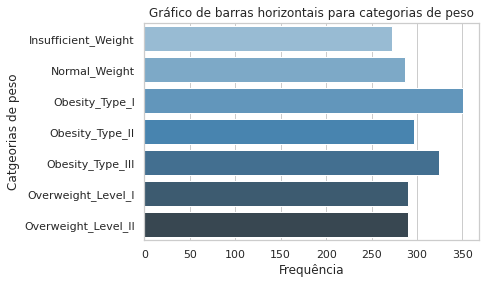

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dataset,y='NObeyesdad',
              palette="Blues_d").set(title = 'Gráfico de barras horizontais para categorias de peso',
                                     xlabel = "Frequência",
                                     ylabel = 'Catgeorias de peso')
plt.show()

Algumas informações sumarizadas para as variáveis contínuas. Com base nos resultados, não há necessidade de imputar valores ou arrumar inconsistência nos dados.

In [ ]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Modificando base de dados

Retirando as colunas "Height" e "Weight" da base de dados

In [ ]:
dataset = dataset.drop(columns=['Height','Weight'])

Separando os dados em **x_data** e **y_data**, onde **x_data** contém as variáveis utilizadas para predição dos níveis de obesidade e **y_data** contém a variável que representa o nível de obesidade.

In [ ]:
x_data = dataset.iloc[:,:-1]
y_data = dataset.iloc[:,-1:]

### Splitando dados em bases de treino e teste

Splitando os dados, considerando a proporção de 80% para treinamento e 20% para teste.

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x_data,y_data,
                                                        test_size = 0.2,
                                                        random_state= 42,
                                                        stratify = y_data)

Criando "dummies" para variáveis categóricas

In [ ]:
treino_y = pd.get_dummies(treino_y)
treino_x = pd.get_dummies(treino_x)
teste_x = pd.get_dummies(teste_x)
teste_y = pd.get_dummies(teste_y)

Ajustando a escala das variáveis numéricas

In [ ]:
sc = MinMaxScaler()

treino_x = sc.fit_transform(treino_x)
teste_x = sc.fit_transform(teste_x)

### Criação do modelo de redes neurais

Criação da função que gera modelos com uma camada oculta

In [ ]:
def Modelo_OneHL(n_camadas,act_HL,act_OL):
  classificador = Sequential()
  classificador.add(Dense(units = n_camadas, activation= act_HL  , input_dim = 29))
  classificador.add(Dense(units = 7, activation = act_OL))
  
  alg = Adam(learning_rate = 0.01)

  classificador.compile(optimizer= alg, metrics = ['accuracy'], loss = 'binary_crossentropy')

  start = time.time() 

  parada = EarlyStopping(monitor = 'loss', patience = 25)
  hist = classificador.fit(treino_x, treino_y,epochs=1000,validation_data = (teste_x, teste_y),
                  batch_size = 16, callbacks = parada,verbose=0)
  
  end = time.time()
  print(f'Duração: {end - start} segundos')
  
  _, acc_treino = classificador.evaluate(treino_x, treino_y, verbose = 0)
  _, acc_teste = classificador.evaluate(teste_x, teste_y, verbose = 0)
  print(f'Performace no treino: {round(acc_treino,3)} -- Performace no teste: {round(acc_teste,3)}')

  return hist


Criação da função que gera modelos com duas camadas ocultas



In [ ]:
def Modelo_TwoHL(n_camadas1,act_HL1,n_camadas2,act_HL2,act_OL):
  classificador = Sequential()
  classificador.add(Dense(units = n_camadas1, activation= act_HL1, input_dim = 29))
  classificador.add(Dense(units = n_camadas2, activation = act_HL2))
  classificador.add(Dense(units = 7, activation = act_OL))
  
  alg = Adam(learning_rate = 0.01)

  classificador.compile(optimizer= alg, metrics = ['accuracy'], loss = 'binary_crossentropy')

  start = time.time() 

  parada = EarlyStopping(monitor = 'loss', patience = 25)
  hist = classificador.fit(treino_x, treino_y,epochs=1000,validation_data = (teste_x, teste_y),
                  batch_size = 16, callbacks = parada,verbose=0)
  end = time.time()
  print(f'Duração: {end - start} segundos')
  
  _, acc_treino = classificador.evaluate(treino_x, treino_y, verbose = 0)
  _, acc_teste = classificador.evaluate(teste_x, teste_y, verbose = 0)
  print(f'Performace no treino: {round(acc_treino,3)} -- Performace no teste: {round(acc_teste,3)}')

  return hist

Criação de função geradora de gráficos

In [ ]:
def Gera_Graf(modelo):
  plt.figure(figsize = (12, 6))
  plt.style.use('ggplot')

  plt.subplot(121)
  plt.title('Função de Perda')
  plt.plot(modelo.history['loss'], label='TREINO')
  plt.plot(modelo.history['val_loss'], label='TESTE')
  plt.ylim(0, 1.5)
  plt.legend(loc = 'lower left') 

# plot accuracy during training
  plt.subplot(122)
  plt.title('Acurácia')
  plt.plot(modelo.history['accuracy'], label='TREINO')
  plt.plot(modelo.history['val_accuracy'], label='TESTE')
  plt.ylim(0, 1)
  plt.legend(loc = 'lower left')

  plt.show()



> **Modelo com uma camada oculta e diferentes quantidades de neurônios e funções de ativação**





1.   Modelo com 10 neurônios e funções de ativação "relu" e "softmax"



In [ ]:
Modelo1 = Modelo_OneHL(10,'relu','softmax')

Duração: 35.53294825553894 segundos
Performace no treino: 0.77 -- Performace no teste: 0.664


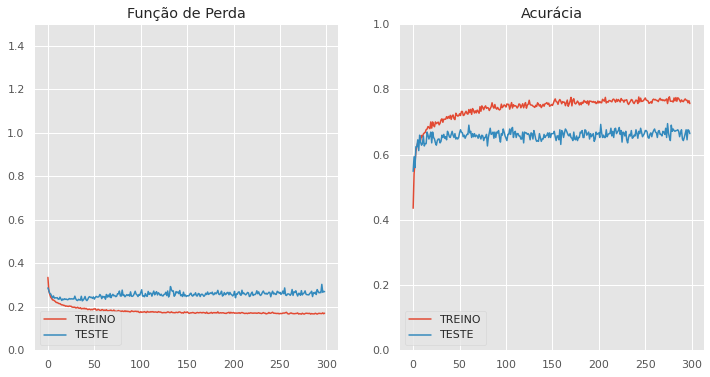

In [ ]:
Gera_Graf(Modelo1)

2.   Modelo com 100 neurônios e funções de ativação "relu" e "softmax"

In [ ]:
Modelo2 = Modelo_OneHL(100,'relu','softmax')

Duração: 19.939672708511353 segundos
Performace no treino: 0.956 -- Performace no teste: 0.742


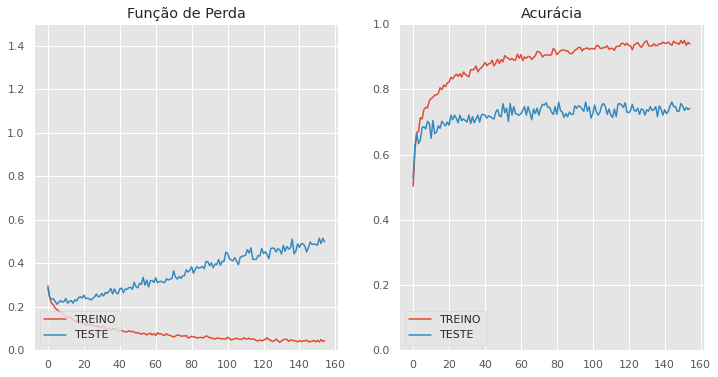

In [ ]:
Gera_Graf(Modelo2)

3.   Modelo com 100 neurônios e funções de ativação "tanh" e "softmax"

In [ ]:
Modelo3 = Modelo_OneHL(100,'tanh','softmax')

Duração: 43.110496282577515 segundos
Performace no treino: 0.969 -- Performace no teste: 0.735


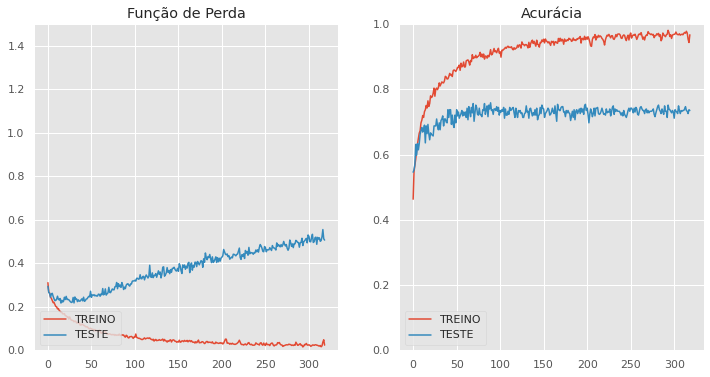

In [ ]:
Gera_Graf(Modelo3)

4.   Modelo com 100 neurônios e funções de ativação "elu" e "sigmoid"

In [ ]:
Modelo4 = Modelo_OneHL(100,'elu','sigmoid')

Duração: 52.15087366104126 segundos
Performace no treino: 0.949 -- Performace no teste: 0.702


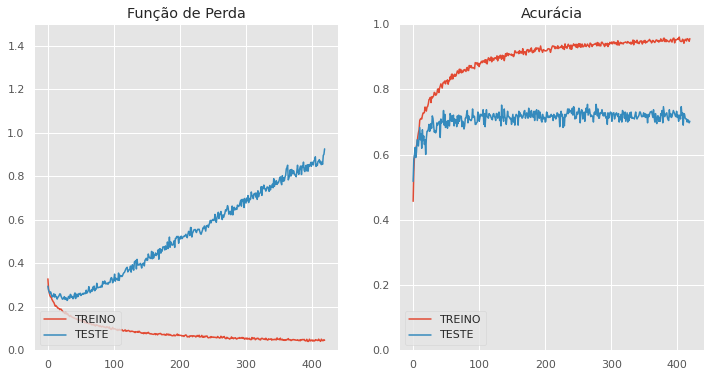

In [ ]:
Gera_Graf(Modelo4)

5.   Modelo com 100 neurônios e funções de ativação "elu" e "softmax"

In [ ]:
Modelo5 = Modelo_OneHL(100,'elu','softmax')

Duração: 33.379266023635864 segundos
Performace no treino: 0.933 -- Performace no teste: 0.719


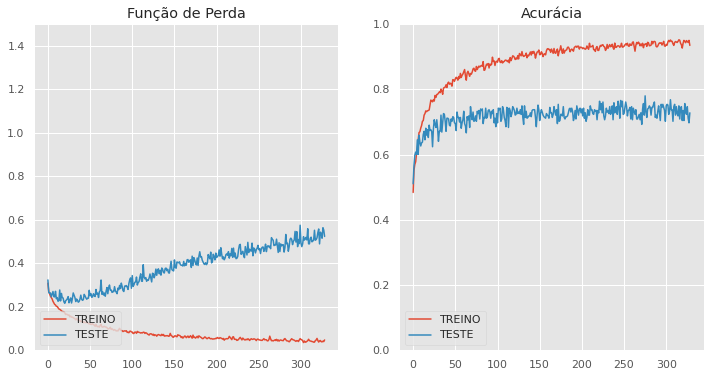

In [ ]:
Gera_Graf(Modelo5)

> **Modelo com duas camadas ocultas e diferentes quantidades de neurônios e funções de ativação**

1.   Modelo com 10 e 10 neurônios, unções de ativação "relu" e "softmax"

In [ ]:
Modelo6 =  Modelo_TwoHL(10,'relu',10,'relu','softmax')

Duração: 35.15542912483215 segundos
Performace no treino: 0.822 -- Performace no teste: 0.669


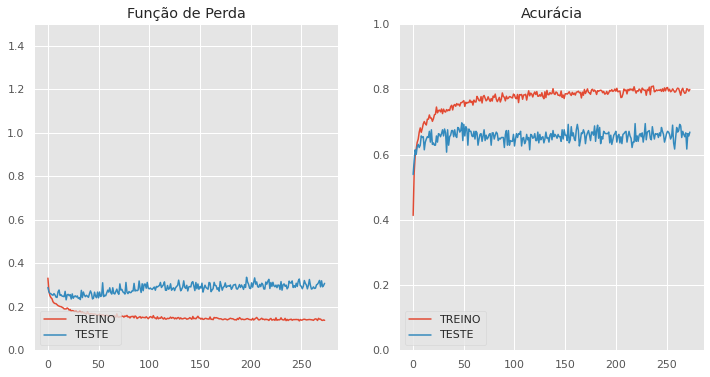

In [ ]:
Gera_Graf(Modelo6)

2.   Modelo com 50 e 50 neurônios e funções de ativação "relu" e "softmax"

In [ ]:
Modelo7 =  Modelo_TwoHL(50,'relu',50,'relu','softmax')

Duração: 15.323403596878052 segundos
Performace no treino: 0.964 -- Performace no teste: 0.735


In [ ]:
Gera_Graf(Modelo7)

3.   Modelo com 50 e 50 neurônios e funções de ativação "tanh" e "sigmoid"

In [ ]:
Modelo8 =  Modelo_TwoHL(50,'tanh',50,'tanh','sigmoid')

Duração: 23.887630701065063 segundos
Performace no treino: 0.948 -- Performace no teste: 0.728


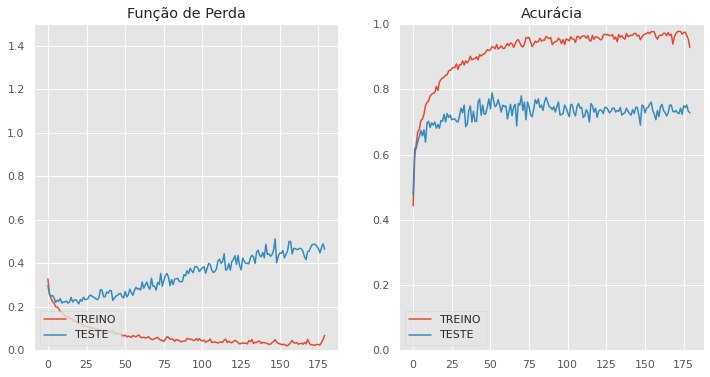

In [ ]:
Gera_Graf(Modelo8)

### Considerações finais


*   De forma geral, os modelos de redes neurais ajustados alcançaram resultados razoáveis. 
*   Para todos os modelos, a acurácia considerando o banco de teste foi superior à 70%, enquanto que no banco de treinamento foi superior à 85% (exceto modelos com 10 neurônios para camada oculta).
* Não foi possível observar melhora na acurácia ao alternar as funções de ativação e número de camadas ocultas, única melhora visível na acurácia foi o aumento aumentando o número de neuônios em cada camada oculta (de 10 para 100). 
* Análisando o gráfico da função perda de alguns modelos, é possível observar um sobreajuste do modelo aos dados de treinamento (se ajusta bem aos dados de treinamento, mas não tão bem aos dados de teste).
* Melhor processamento/tratamento dos dados pode melhorar os resultados encontrados (diminuição do nº de categorias de peso, categorização das variáveis numéricas, técnicas de redução de dimensionalidade e etc).
* Aparentemente, as melhores funções de ativação para esse problema em específico são 'relu'(camada oculta) e 'softmax'(camada de saída). Com relação ao número de camadas e  neurônios, o ideal é que o 'setup' seja de uma camada e alta quantidade de neurônios ou duas camadas e cada uma com uma quantidade razoàvel de neurônios. (escolhas levando em consideração, o tempo de processamento e acurácia na base de teste).

### Referências



1.   Repetto, Giuseppe, Rizzolli, Jacqueline, & Bonatto, Cassiane. (2003). Prevalência, riscos e soluções na obesidade e sobrepeso: Here, There, and Everywhere. *Arquivos Brasileiros de Endocrinologia & Metabologia, 47*(6), 633-635. https://doi.org/10.1590/S0004-27302003000600001
2.   Pontes, Luciano Meireles de, Sousa, Maria do Socorro Cirilo de, & Lima, Roberto Teixeira de. (2006). Perfil dietético, estado nutricional e prevalência de obesidade centralizada em praticantes de futebol recreativo. *Revista Brasileira de Medicina do Esporte, 12*(4), 201-205. https://doi.org/10.1590/S1517-86922006000400007
3.   Palechor, Fabio Mendoza & Manotas, Alexis de la Hoz. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. *Data in Brief*. Vol 25. https://doi.org/10.1016/j.dib.2019.104344.

